# Measuring Complexity

In mid 2019, I wrote an article for InfoQ entitled [Obscuring Complexity](https://www.infoq.com/articles/obscuring-complexity/) which was about how software architects manage the complexity of their systems in order to mitigate release disruption while maintaining sufficient feature velocity. I talk about complexity a lot in this blog too, especially the blogs that review technology stacks. In these reviews, I implement a polyglot persistent, feature identical, rudimentary news feed microservice in the technology of interest. I tend to compare the different news feed implementations with complexity related metrics such as Lines of Code or Cyclomatic Complexity. I always end up apologizing about how poorly these metrics actually reflect on complexity but I keep using them in the comparisons anyway. It turns out that measuring complexity is, well, quite complex actually. Understanding complexity when evaluating architectures is so important that a poor measure is better than no measure at all. I am referring here to code complexity and neither space nor time complexity which is very similar for all of the news feed implementations since they all use almost the same algorithms and data structures.

While I was evaluating GraphQL, I noticed a bug that turned out to be in all of the implementations to one degree or another. I wondered if this might be a good opportunity to get a more practical, albeit anecdotal, measure on complexity. After all, what good is studying complexity if it cannot reveal how hard it will be to maintain the code over time? I fixed all of the implementations in a single commit then measured and recorded how many lines of code needed to be added and / or removed (as calculated by the Myers diff algorithm) for each implementation.

The bug lies in how friending information is to be interpreted. Friending is supposed to be bidirectional. If A is a friend of B then B is a friend of A. Outbound news feed items of any participant are disseminated to the inbound news feeds of that participant's friends. If A is a friend of B and B posted a news feed item, then that news feed item should appear to A. News feed items are supposed to appear at most once. If both A and B explicitly friended each other and one posts a news feed item, then it should show up to the other only once. The implementations that used Object Relational Mapping did not comply with bidirectionality and none of the implementations complied with the uniqueness constraint.

This was but one cross microservice change. I wanted to implement another in order to gain a wider perspective. When I originally designed the swagger spec, I did not take care to make the API as RESTful as possible. I made another cross microservice enhancement, this time to increase the RESTfulness of all microservices except feeds 7 and 10. I changed the paths to more accurately reflect the data model hierarchy and I changed the foreign key ids to be HATEOAS compliant.

In this notebook, I explore how effective various complexity measures are by comparing them to the number of changes made to this repo in order to implement the two enhancedments previously discussed.

## Lines of Code

The first graph compares the average per file number of Lines of Code for each feed with the LoC for each fix (normalized) for the bug and the increased RESTfulness feature.

Text(0.5, 1.0, 'complexity')

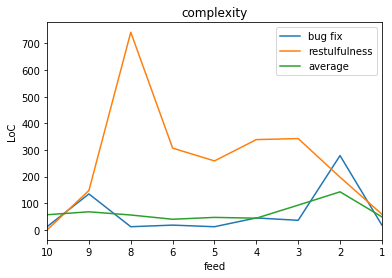

In [1]:
%matplotlib inline
import pandas as pd
input = pd.read_csv("fc.csv")
ax = input[['normalized', 'rest', 'avg']].plot()
ax.set_xlabel("feed")
ax.set_xticklabels(input["feed"])
ax.legend(["bug fix", "restulfulness", "average"])
ax.set_ylabel("LoC")
ax.set_title("complexity")

## Cyclomatic Complexity

McCabe Cyclomatic Complexity is a measure of the number of different code paths in a program. It is used mostly as an upper bound on the number of unit tests needed. This graph shows cyclomatic complexity per feed. 

Text(0.5, 1.0, 'complexity')

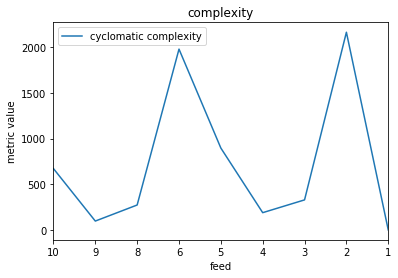

In [15]:
%matplotlib inline
import pandas as pd
input = pd.read_csv("fc.csv")
ax = input[['CC']].plot()
ax.set_xlabel("feed")
ax.set_xticklabels(input["feed"])
ax.legend(["cyclomatic complexity"])
ax.set_ylabel("metric value")
ax.set_title("complexity")

## Pairwise Correlation

Using the pearson standard correlation coefficient, average per file LoC correlated with the bug fix LoC almost twice as well as the CC measure. The increased RESTfulness feature LoC had very low correlation with average per file LoC or any other metric for that matter.

In [2]:
import pandas as pd
input = pd.read_csv("fc.csv")
input[['normalized', 'rest', 'CC', 'avg']].corr(method = "pearson")

,normalized,rest,CC,avg
normalized,1.000000,-0.189898,0.479154,0.858368
rest,-0.189898,1.000000,-0.067405,-0.084276
CC,0.479154,-0.067405,1.000000,0.432308
avg,0.858368,-0.084276,0.432308,1.000000
